## Simple Linear Regression
1. For this exercise we will need __`matplotlib.pyplot`__ and __`numpy`__
* Don't forget to inline your __`matplotlib`__ images!

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## First, we will model random data
1. Generate 50 random numbers between 1 and 10 called __`x`__
* Create a second dataset y with a linear relationship to __`x`__ plus some noise, e.g.,
$$ y = 2x - 5 + noise $$
* Plot __`x`__ vs. __`y`__

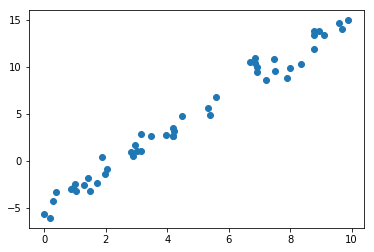

In [4]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

## Given the linear relationship in the data, it should be trivial to "learn" the coefficients of the line using a __`LinearRegression`__ model from __`scikit-learn`__

1. Create the model (__`fit_intercept=True`__)
* Fit the model to our data
* Generate a range of 1000 values between 0 and 10.
* Use the model to predict the outcome of these new values.
* Plot the new __`x y`__ data on top of our original randomized sample data.

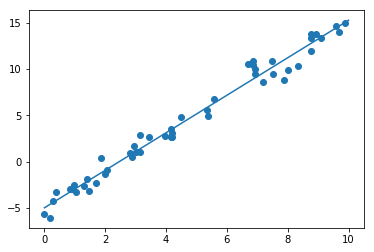

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

## Evaluate your model
1. Print out the slope and intercept for the model and compare it to the values you used to generate the original y data
* It should be pretty close–why isn't it exact?

In [6]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.02720881036
Model intercept: -4.99857708555


## Now let's model some actual sales data
* After the following imports, read in the file __`data/WA_Fn-UseC_-Sales-Win-Loss.csv`__

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
dat = pd.read_csv("data/WA_Fn-UseC_-Sales-Win-Loss.csv")

## Explore the data a bit

In [9]:
dat

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.696360,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.000000,1.000000,0.000000,1
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.000000,0.000000,0.000000,1
3,1675224,Shelters & RV,Performance & Non-auto,NaN,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.000000,0.000000,0.000000,1
4,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.000000,0.141125,0.000000,4
5,1692390,Shelters & RV,Performance & Non-auto,Pacific,Reseller,89,Loss,3,114,0,232522,5,1,0,Unknown,0.000000,0.000877,0.000000,5
6,1935837,Garage & Car Care,Car Accessories,Pacific,Fields Sales,111,Won,12,112,112,20001,4,5,0,Unknown,0.308863,0.568487,0.122650,2
7,1952571,Exterior Accessories,Car Accessories,Pacific,Fields Sales,82,Loss,6,70,70,450000,1,1,0,Known,0.263610,0.736390,0.000000,6
8,1999486,Batteries & Accessories,Car Accessories,Northwest,Fields Sales,68,Loss,8,156,156,250000,1,5,0,None,0.000000,0.562821,0.437179,6
9,2052337,Exterior Accessories,Car Accessories,Pacific,Reseller,18,Loss,7,50,50,55003,1,1,0,Unknown,0.000000,0.585317,0.414683,4


## Select/Clean the data

1. We only want rows that have a "Won" value for the "Opportunity Result" and then we want to drop that column from the filtered data. 
* We need to convert the categorical data into dummy binary elements. Use the function __`get_dummies()`__ function for this purpose.
* Save off the __`Opportunity Amount USD`__ results for comparison purposes but then drop that column
* Split the remaining data into training and test data for our filtered results and the winning amounts (saved data from step 3)

In [10]:
won = dat[dat["Opportunity Result"] == "Won"].drop(["Opportunity Result"], axis=1)
won = pd.get_dummies(won)
won_output = won["Opportunity Amount USD"]
won_filtered = won.drop(["Opportunity Number", "Opportunity Amount USD"],axis=1)
won_train, won_test, won_train_output, won_test_output = train_test_split(won_filtered, won_output, test_size=10000)

## Model the data
* Create a __`LinearRegression`__ model and then fit the training data and its output

In [12]:
regr = LinearRegression()
linreg = regr.fit(won_train, won_train_output)

## View results
* Create a __`DataFrame`__ of the coefficients from the regression model
* Sort the values
* Display the values

In [17]:
coef = pd.DataFrame({"coef" : linreg.coef_.tolist()},index=won_train.columns)
coef.sort_values('coef', ascending=False)

,coef
Deal Size Category,62831.621703
Route To Market_Telesales,15375.314111
Route To Market_Fields Sales,10067.602247
Supplies Subgroup_Interior Accessories,9728.338403
Region_Pacific,9660.862659
Supplies Subgroup_Garage & Car Care,7145.564670
Supplies Subgroup_Performance Parts,5587.451398
Competitor Type_Known,5002.001697
Supplies Group_Performance & Non-auto,4979.375285
Supplies Group_Car Accessories,4468.693830


## How did we do?
1. Predict the results from the test data
* Measure the predictions against the actual winning results

In [16]:
from sklearn.metrics import mean_absolute_error
y_pred = linreg.predict(won_test)
y_actual = won_test_output
print("MAE : ${:,.2f}".format(mean_absolute_error(y_actual, y_pred)))
print("mean: ${:,.2f}".format(np.mean(y_actual)))

MAE : $52,655.33
mean: $72,868.34
